In [1]:
import pandas as pd
import numpy as np
import re
from datetime import date, time, datetime
!pip install texthero
import nltk
#nltk.download('all')

     |████████████████████████████████| 235 kB 7.7 MB/s 
     |████████████████████████████████| 1.5 MB 32.2 MB/s 
     |████████████████████████████████| 748 kB 47.0 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


# Import Custom Dataset

In [2]:
df = pd.read_excel('/content/latest hotel data.xlsx')
df=df.fillna(method='ffill')     #NAN convert to upper id here
df.head()


,Hotel Name,Review,Reviewer Name,Date,Reviewer,Rating
0,Hilton Garden Inn New York Times Square North,"comfortable, friendly, good.\n\n \n it was in ...",Laura,December 2021,Chile,8.0
1,Hilton Garden Inn New York Times Square North,"\n No clean towels in 6 days or room cleaned,...",Danielle,December 2021,United Kingdom,7.0
2,Hilton Garden Inn New York Times Square North,Enjoyed our stay.\nMake sure you get your park...,Berkley,January 2022\n,United States,9.0
3,Hilton Garden Inn New York Times Square North,modern hotel in a great location but with limi...,Karin,January 2022\n,United Kingdom,7.0
4,Hilton Garden Inn New York Times Square North,"excellent staff , near to Times Square.\n\nRoo...",\nParas,2022-02-01 00:00:00,India,7.0


In [3]:
df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].dt.strftime('%Y-%m')
df=df.sort_values(by=['Date'])

In [4]:
df

,Hotel Name,Review,Reviewer Name,Date,Reviewer,Rating
70,Hilton Garden Inn New York Times Square North,"Location is perfect, a couple of minutes to Ti...",Naraigh,2020-01,Ireland,7.5
64,Hilton Garden Inn New York Times Square North,Good Location and value for money,Muhammad,2020-01,Egypt,7.9
65,Hilton Garden Inn New York Times Square North,"Super central location, modern & easy . locati...",Thomas,2020-01,Germany,8.8
69,Hilton Garden Inn New York Times Square North,"Great place in NYC. Awesome hotel, great locat...",Brett,2020-01,United States,10.0
67,Hilton Garden Inn New York Times Square North,"The location was fantastic, close to but far ...",Shazb,2020-01,Australia,9.0
...,...,...,...,...,...,...
2,Hilton Garden Inn New York Times Square North,Enjoyed our stay.\nMake sure you get your park...,Berkley,2022-01,United States,9.0
15,Hilton Garden Inn New York Times Square North,I liked how clean it was and the bathroom size...,Mendez,2022-01,United States,10.0
10,Hilton Garden Inn New York Times Square North,perfect spot to see the city- central to every...,Dawn,2022-01,United States,8.0
8,Hilton Garden Inn New York Times Square North,Great location. Five minutes walk to Times Sq...,Lulia,2022-01,Romania,8.0


In [5]:
df.reset_index(inplace=True)

In [6]:
df.columns

Index(['index', 'Hotel Name', 'Review', 'Reviewer Name', 'Date', 'Reviewer ',
       'Rating'],
      dtype='object')

In [7]:
df.drop(columns=['index'],inplace=True)
df

,Hotel Name,Review,Reviewer Name,Date,Reviewer,Rating
0,Hilton Garden Inn New York Times Square North,"Location is perfect, a couple of minutes to Ti...",Naraigh,2020-01,Ireland,7.5
1,Hilton Garden Inn New York Times Square North,Good Location and value for money,Muhammad,2020-01,Egypt,7.9
2,Hilton Garden Inn New York Times Square North,"Super central location, modern & easy . locati...",Thomas,2020-01,Germany,8.8
3,Hilton Garden Inn New York Times Square North,"Great place in NYC. Awesome hotel, great locat...",Brett,2020-01,United States,10.0
4,Hilton Garden Inn New York Times Square North,"The location was fantastic, close to but far ...",Shazb,2020-01,Australia,9.0
...,...,...,...,...,...,...
66,Hilton Garden Inn New York Times Square North,Enjoyed our stay.\nMake sure you get your park...,Berkley,2022-01,United States,9.0
67,Hilton Garden Inn New York Times Square North,I liked how clean it was and the bathroom size...,Mendez,2022-01,United States,10.0
68,Hilton Garden Inn New York Times Square North,perfect spot to see the city- central to every...,Dawn,2022-01,United States,8.0
69,Hilton Garden Inn New York Times Square North,Great location. Five minutes walk to Times Sq...,Lulia,2022-01,Romania,8.0


In [8]:
df['Date'].value_counts()

2021-12    17
2022-01     8
2020-01     7
2021-01     6
2020-09     5
2020-03     4
2020-10     4
2020-11     4
2020-02     3
2020-12     3
2021-02     3
2021-03     3
2021-11     3
2022-02     1
Name: Date, dtype: int64

# Review Rating Scaling

In [9]:
def rating_scale(x):
  x=x/10
  return x
df['Rating']=df['Rating'].apply(rating_scale)

# **Overall rating** (GIVEN)

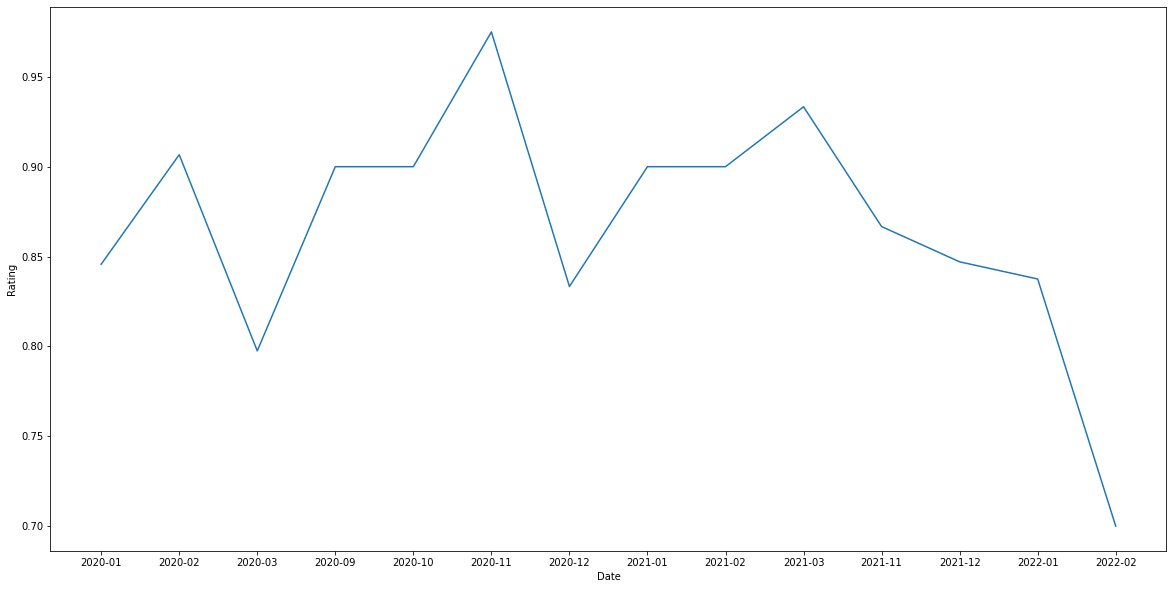

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

# Plot the responses for different events and regions
sns.lineplot(x="Date", y="Rating",
             ci=None,
             data=df)

In [11]:
import spacy
from tqdm import tqdm
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 5.9 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [12]:
df.to_csv('latest hotel review data.csv')

In [13]:
df['review']=df['Review'].astype(str)


In [14]:
import nltk
from nltk.corpus import stopwords

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords ########
from nltk.stem import SnowballStemmer ############


#word to vec
import gensim

import re #####
import os
from collections import Counter #######
import logging ###
import time
import pickle ######
import itertools ######

nlp=spacy.load("en_core_web_sm") 

from textblob import TextBlob # TextBlob - Python library for processing textual data
import random
np.random.seed(0)


# import string library function 
import string 

In [15]:
df['raw_review']=df['review']

## Abbreviation Handling / Shortcut

In [16]:
punctuation_lst =['.','!',',',':',';','?']
abbr_dict={
    "what's":"what is",
    "what're":"what are",
    "who's":"who is",
    "who're":"who are",
    "where's":"where is",
    "where're":"where are",
    "when's":"when is",
    "when're":"when are",
    "how's":"how is",
    "how're":"how are",

    "i'm":"i am",
    "we're":"we are",
    "you're":"you are",
    "they're":"they are",
    "it's":"it is",
    "he's":"he is",
    "she's":"she is",
    "that's":"that is",
    "there's":"there is",
    "there're":"there are",

    "i've":"i have",
    "we've":"we have",
    "you've":"you have",
    "they've":"they have",
    "who've":"who have",
    "would've":"would have",
    "not've":"not have",

    "i'll":"i will",
    "we'll":"we will",
    "you'll":"you will",
    "he'll":"he will",
    "she'll":"she will",
    "it'll":"it will",
    "they'll":"they will",

    "isn't":"is not",
    "wasn't":"was not",
    "aren't":"are not",
    "weren't":"were not",
    "can't":"can not",
    "couldn't":"could not",
    "don't":"do not",
    "didn't":"did not",
    "shouldn't":"should not",
    "wouldn't":"would not",
    "doesn't":"does not",
    "haven't":"have not",
    "hasn't":"has not",
    "hadn't":"had not",
    "won't":"will not",
    ###############
    #"nyc" : "nice",               
    "gd" :  "good",
    "fyn" : "fine",               
  

    '\s+':' ', # replace multi space with one single space
}

In [17]:
def process_data(data):
    
    data.review=data.review.str.lower() # conver to lower case

    data.review=data.review.astype(str)
   
    data.replace(abbr_dict,regex=True,inplace=True)
  
    return data

process_data(df)
df.head()

,Hotel Name,Review,Reviewer Name,Date,Reviewer,Rating,review,raw_review
0,Hilton Garden Inn New York Times Square North,"Location is perfect, a couple of minutes to Ti...",Naraigh,2020-01,Ireland,0.75,"location is perfect, a couple of minutes to ti...","Location is perfect, a couple of minutes to Ti..."
1,Hilton Garden Inn New York Times Square North,Good Location and value for money,Muhammad,2020-01,Egypt,0.79,good location and value for money,Good Location and value for money
2,Hilton Garden Inn New York Times Square North,"Super central location, modern & easy . locati...",Thomas,2020-01,Germany,0.88,"super central location, modern & easy . locati...","Super central location, modern & easy . locati..."
3,Hilton Garden Inn New York Times Square North,"Great place in NYC. Awesome hotel, great locat...",Brett,2020-01,United States,1.00,"great place in nyc. awesome hotel, great locat...","Great place in NYC. Awesome hotel, great locat..."
4,Hilton Garden Inn New York Times Square North,"The location was fantastic, close to but far ...",Shazb,2020-01,Australia,0.90,"the location was fantastic, close to but far ...","The location was fantastic, close to but far ..."


In [18]:
df['raw_review'].iloc[10]

'Surprisingly modern hotel in a great location and excellent value for money. We were impressed with the quality of the finishes in the hotel. Very modern and clean. The staff were friendly and helpful. The hotel is literally 200m from Times Square so the location was great as was the nearby subway. · The room was a little small but hardly a big problem. Everything else was above average.'

# Lower Casing and removal of numeric value

In [19]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def pre_process(sentence):
  sentence=str(sentence)
  sentence = sentence.lower()
  rem_num = re.sub('[0-9]+', '',sentence)
  
  
  return rem_num


df['clean_review']= df['review'].apply(pre_process)
txt='Nice hotel with very friendly and helpful staff. Nice hotel \n , with very friendly staff and helpful - great choice for breakfast , something for everyone.'
pre_process(txt)



'nice hotel with very friendly and helpful staff. nice hotel \n , with very friendly staff and helpful - great choice for breakfast , something for everyone.'

In [20]:
df.drop_duplicates(subset=['clean_review'], keep='last')
df.shape

(71, 9)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder   ###########
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.manifold import TSNE ######
from sklearn.feature_extraction.text import TfidfVectorizer #############



In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Sorting Unique Words 

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
stop_words = nltk.corpus.stopwords.words('english')

def remove_stopwords1(txt):
  rvm_stpwords = [i for i in txt.split() if i not in stop_words]
  rmv_stpwords_join = ' '.join(rvm_stpwords)
  return rmv_stpwords_join


hotels= df['clean_review'].apply(remove_stopwords1) 
hotels = [line.replace("\n", "") for line in hotels]



def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    
    get_top_n_words(["I love Python", "Python is a language programming", "Hello world", "I love the world"]) -> 
    [('python', 2),
     ('world', 2),
     ------

    """
    
    
    vec = CountVectorizer().fit(corpus) #get a Bag of Word model that has cleaned the text, removing non-aphanumeric characters and stop words.
    bag_of_words = vec.transform(corpus) #bag_of_words a matrix where each row represents a specific text in corpus and each column represents a word in vocabulary
    # bag_of_words[i,j] is the occurrence of word j in the text i.

    sum_words = bag_of_words.sum(axis=0)  #sum_words is a vector that contains the sum of each word occurrence in all texts in the corpus
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]



common_words = get_top_n_words(hotels,20000)
# for word, freq in common_words:
#     print(word, freq)
cmn_word_df = pd.DataFrame(common_words,columns=['words','count'])
cmn_word_df

,words,count
0,location,53
1,room,49
2,hotel,36
3,clean,34
4,great,32
...,...,...
714,furniture,1
715,toiletris,1
716,done,1
717,disappointing,1


## top 20 Words 

Text(0, 0.5, 'Count')

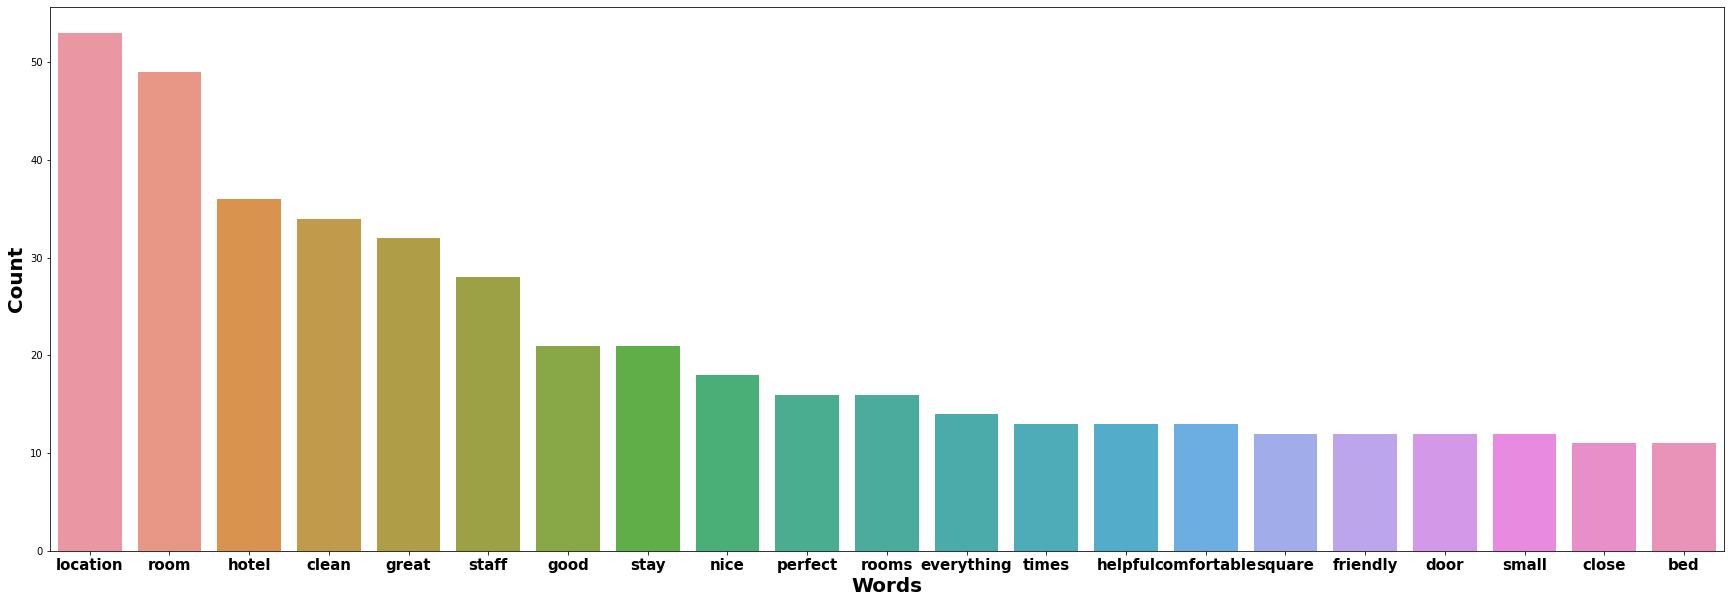

In [24]:
cmn_word_df=cmn_word_df[:21]
import seaborn 
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(30, 10))

tidy = cmn_word_df.melt(id_vars='words').rename(columns=str.title)
ax=seaborn.barplot(x=cmn_word_df['words'], y='Value',  data=tidy, ax=ax1 )
        
plt.xticks(fontsize=15, weight="bold")   
plt.xlabel("Words",fontsize=20,weight='bold')
plt.ylabel("Count",fontsize=20,weight='bold')           

In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Extra Expression Handling (soooo gooooddd)

In [26]:
import re
def extra_expression(txt):          #for shortcut words fuction
  txt= str(txt)
  txt=txt+ ' '
  txt=re.sub('so+(?=[^a-z])','so ',txt)
  txt=re.sub('goo+d+(?=[^a-z])','good ',txt)
  txt=re.sub('wo+w+(?=[^a-z])','wow ',txt)
  txt=re.sub('nice+(?=[^a-z])','nice ',txt)
  txt=re.sub('fine+(?=[^a-z])','fine ',txt)
  txt=re.sub('lovely+(?=[^a-z])','lovely ',txt)
  txt=re.sub('very+(?=[^a-z])','very ',txt)
  txt=re.sub('ba*d+(?=[^a-z])','bad ',txt)
  txt=re.sub('lo+ve*(?=[^a-z])','love ',txt)
  txt=re.sub('\s+', ' ', txt)
  return txt


## Random check for extra expression

In [27]:
txt1="it is soooo goooooodddd"
extra_expression(txt1)

'it is so good '

In [28]:

for i,txt in enumerate(df['clean_review']):
  df['clean_review'].iloc[i]=extra_expression(txt)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


# TF-IDF

In [29]:

# import required module
from sklearn.feature_extraction.text import TfidfVectorizer
# create object
tfidf = TfidfVectorizer()
# get tf-df values
result = tfidf.fit_transform(df['clean_review'])
x=result.toarray()
y=tfidf.vocabulary_

In [30]:
df

,Hotel Name,Review,Reviewer Name,Date,Reviewer,Rating,review,raw_review,clean_review
0,Hilton Garden Inn New York Times Square North,"Location is perfect, a couple of minutes to Ti...",Naraigh,2020-01,Ireland,0.75,"location is perfect, a couple of minutes to ti...","Location is perfect, a couple of minutes to Ti...","location is perfect, a couple of minutes to ti..."
1,Hilton Garden Inn New York Times Square North,Good Location and value for money,Muhammad,2020-01,Egypt,0.79,good location and value for money,Good Location and value for money,good location and value for money
2,Hilton Garden Inn New York Times Square North,"Super central location, modern & easy . locati...",Thomas,2020-01,Germany,0.88,"super central location, modern & easy . locati...","Super central location, modern & easy . locati...","super central location, modern & easy . locati..."
3,Hilton Garden Inn New York Times Square North,"Great place in NYC. Awesome hotel, great locat...",Brett,2020-01,United States,1.00,"great place in nyc. awesome hotel, great locat...","Great place in NYC. Awesome hotel, great locat...","great place in nyc. awesome hotel, great locat..."
4,Hilton Garden Inn New York Times Square North,"The location was fantastic, close to but far ...",Shazb,2020-01,Australia,0.90,"the location was fantastic, close to but far ...","The location was fantastic, close to but far ...","the location was fantastic, close to but far ..."
...,...,...,...,...,...,...,...,...,...
66,Hilton Garden Inn New York Times Square North,Enjoyed our stay. Make sure you get your parki...,Berkley,2022-01,United States,0.90,enjoyed our stay. make sure you get your parki...,Enjoyed our stay. Make sure you get your parki...,enjoyed our stay. make sure you get your parki...
67,Hilton Garden Inn New York Times Square North,I liked how clean it was and the bathroom size...,Mendez,2022-01,United States,1.00,i liked how clean it was and the bathroom size...,I liked how clean it was and the bathroom size...,i liked how clean it was and the bathroom size...
68,Hilton Garden Inn New York Times Square North,perfect spot to see the city- central to every...,Dawn,2022-01,United States,0.80,perfect spot to see the city- central to every...,perfect spot to see the city- central to every...,perfect spot to see the city- central to every...
69,Hilton Garden Inn New York Times Square North,Great location. Five minutes walk to Times Sq...,Lulia,2022-01,Romania,0.80,great location. five minutes walk to times sq...,Great location. Five minutes walk to Times Sq...,great location. five minutes walk to times sq...


In [31]:
rid1=[]
for i in range(df.shape[0]):
  rid1.append(i)

df['rid']=rid1
df.head()

,Hotel Name,Review,Reviewer Name,Date,Reviewer,Rating,review,raw_review,clean_review,rid
0,Hilton Garden Inn New York Times Square North,"Location is perfect, a couple of minutes to Ti...",Naraigh,2020-01,Ireland,0.75,"location is perfect, a couple of minutes to ti...","Location is perfect, a couple of minutes to Ti...","location is perfect, a couple of minutes to ti...",0
1,Hilton Garden Inn New York Times Square North,Good Location and value for money,Muhammad,2020-01,Egypt,0.79,good location and value for money,Good Location and value for money,good location and value for money,1
2,Hilton Garden Inn New York Times Square North,"Super central location, modern & easy . locati...",Thomas,2020-01,Germany,0.88,"super central location, modern & easy . locati...","Super central location, modern & easy . locati...","super central location, modern & easy . locati...",2
3,Hilton Garden Inn New York Times Square North,"Great place in NYC. Awesome hotel, great locat...",Brett,2020-01,United States,1.00,"great place in nyc. awesome hotel, great locat...","Great place in NYC. Awesome hotel, great locat...","great place in nyc. awesome hotel, great locat...",3
4,Hilton Garden Inn New York Times Square North,"The location was fantastic, close to but far ...",Shazb,2020-01,Australia,0.90,"the location was fantastic, close to but far ...","The location was fantastic, close to but far ...","the location was fantastic, close to but far ...",4


## Aspect and Opinion Output 

In [32]:
#experiment for get not                              final updated compound noun
prn_lst=['it', 'this', 'that']
aspects_main = []
feature_main =[]
feautures_term_main =[]
aspects = []
feature =[]
feautures_term =[]
raw_txt=[]
weight=[]
date_lst=[]
r_id=[]
rating_given=[]
a=df['rid'].iloc[0]
prev_target=''
for value,txt in enumerate( df['clean_review']):
  rid = df['rid'].iloc[value]
 
  if (rid==a):
    a=rid
    
  elif (rid != a):
    prev_target=''
  
  
  txt=str(txt)
  date=df['Date'].iloc[value]
  rate=df['Rating'].iloc[value]
  #print(txt)
  doc_main = nlp(txt)
  for i, sentence in enumerate(doc_main.sents):
    sentence=str(sentence)
    sentence= re.split(r'([.,;:-])|\s+(?:but|and|or|that|if|because|with)\s+' ,sentence) 
    # the food is salty 
    # too losy
    flag_target=0
    for sent in sentence:
      sent=str(sent)
     
      doc = nlp(sent)
      
   
      if flag_target==0:
        target = ''
      
      opinion_term = ''
      add_neg_pfx = False
      count_punct=0
      flag_punct=0
      for token in doc:
        if (flag_punct==0):
          for tok in doc:
            if(tok.is_punct):
              if (tok.text == "!"): #hotel is good!!!
                count_punct =count_punct + 1      #3
                flag_punct=1
        if  (token.dep_ == 'nsubj' and token.pos_=='NOUN') or (token.pos_=='NOUN') or (token.pos_=='PROPN') :
          compound_flag=0
          for token in [token for token in doc if token.dep_ == 'compound' ]: # Get list of compounds in doc
            if(doc[token.head.i].pos_ =='NOUN') or (doc[token.head.i].pos_=='PROPN'):
              noun = doc[token.i: token.head.i + 1]
              compound_flag=1
            else:
              noun= token
          
          if (compound_flag):
            target=str(noun)
          else:
            target=token.text

          for j in token.children:
            if (j.pos_=='ADJ'):           ########################               
              prepend = ''
              flag=0 
              opinion_term=j.text
              
              for child in j.children:       ### have no child here 
                if (child.dep_=='neg'):
                  flag=1
                elif (child.pos_ != 'ADV' ): #and child.is_left_punct!=True
                  continue
                prepend += child.text + ' '
                if (flag==0):
                  opinion_term = prepend + opinion_term
                elif (flag==1):
                  opinion_term = prepend + opinion_term
                else:
                  opinion_term=opinion_term
                  
              if ((target=='') or (opinion_term=='')):
                continue
              else: 
                if (flag_punct):            #############                     add punct "!"
                  for i in range(count_punct):
                    opinion_term=opinion_term + '!'
                aspects.append({'aspect': target, 'opinion': opinion_term})
                feautures_term.append(opinion_term)
                feature.append(target)
                raw_txt.append(sent)
                prev_target=target
                z=y.get(target)
                date_lst.append(date)
                weight.append(x[value][z])
                r_id.append(rid)
                rating_given.append(rate)

            elif (j.dep_ is 'amod' and j.pos_ is 'ADJ') :    #primary condition
              opinion_term =j.text
              for k in j.lefts:
                if k.dep_ is 'advmod': #secondary condition to get adjective of adjectives
                  opinion_term=k.text+' '+opinion_term
              if ((target=='') or (opinion_term=='')):
                continue
              else: 
                if (flag_punct):            #############                     add punct "!"
                  for i in range(count_punct):
                    opinion_term=opinion_term + '!'
                aspects.append({'aspect': target, 'opinion': opinion_term})
                feautures_term.append(opinion_term)
                feature.append(target)
                raw_txt.append(sent)
                prev_target=target
                z=y.get(target)
                weight.append(x[value][z])
                date_lst.append(date)
                r_id.append(rid)
                rating_given.append(rate)

        if(token.pos_ == 'PRON' and token.is_sent_start and token.text in prn_lst):
          target=prev_target
          

        if (token.dep_=='neg'):   #for negative
          neg_prefix = 'not'
          add_neg_pfx = True #flag

          
          # for child in doc:
          #   if (child.pos_ == 'NOUN'):
          #     target=child.text
          #     print(target)
              
          #   if (child.pos_ != "ADJ" ):
          #     for child in doc:
          #       if(target):
          #         opinion_term= neg_prefix
                
          # if (flag_punct):            #############                     add punct "!"
          #   for i in range(count_punct):
          #     opinion_term=opinion_term + '!' 
          # aspects.append({'aspect': target, 'opinion': opinion_term})
          # feautures_term.append(opinion_term)
          # feature.append(target)
          # raw_txt.append(sent)
          # prev_target=target
          # print(opinion_term)


              
            
        
            

        if (token.pos_=='ADJ'):  #too losy
          if (token.is_sent_start):
            target=prev_target #food
          prepend=''
          for child in token.children:
            if (child.pos_=='ADV' and child.is_sent_start):
              target=prev_target
            if (child.pos_=='ADJ' and child.dep_ is 'amod'):
              prepend += child.text+' '
              
            if (child.pos_ != 'ADV'):
              continue
            
            prepend += child.text + ' '

            
          opinion_term = prepend + token.text      

          if (add_neg_pfx): #if(True)
            opinion_term = neg_prefix +' '+ opinion_term    #not very good
          else:
            opinion_term = opinion_term   #very good
            
          if ((target=='') or (opinion_term=='')):
            continue
          else: 
            if (flag_punct):            #############       add punct "!"
              for i in range(count_punct): #good
                opinion_term=opinion_term + '!' #good!!!
            aspects.append({'aspect': target, 'opinion': opinion_term})
            feautures_term.append(opinion_term)
            feature.append(target)
            raw_txt.append(sent)
            prev_target=target
            z=y.get(target)
            weight.append(x[value][z])
            date_lst.append(date)
            r_id.append(rid)
            rating_given.append(rate)
        

        


       
print(aspects)
#  Went on a 3 day oyster binge, with Fish bringing up the closing, and I am so glad this was the place it O trip ended, 
#  because it was so great! Service was devine, oysters where a sensual as they come, 
#  and the price can't be beat!!! You can't go wrong here. You can't go wrong here.

[{'aspect': 'location', 'opinion': 'perfect'}, {'aspect': 'times', 'opinion': 'square'}, {'aspect': 'times', 'opinion': 'noisy'}, {'aspect': 'location', 'opinion': 'good'}, {'aspect': 'super', 'opinion': 'central'}, {'aspect': 'location', 'opinion': 'central'}, {'aspect': 'rooms', 'opinion': 'very cosy'}, {'aspect': 'rooms', 'opinion': 'helpful'}, {'aspect': 'staff', 'opinion': 'helpful'}, {'aspect': 'bit', 'opinion': 'bigger'}, {'aspect': 'place', 'opinion': 'great'}, {'aspect': 'location', 'opinion': 'great'}, {'aspect': 'location', 'opinion': 'fantastic'}, {'aspect': 'times', 'opinion': 'square'}, {'aspect': 'times', 'opinion': 'close'}, {'aspect': 'times', 'opinion': 'close'}, {'aspect': 'times', 'opinion': 'bryant'}, {'aspect': 'staff', 'opinion': 'friendly'}, {'aspect': 'staff', 'opinion': 'helpful'}, {'aspect': 'beds', 'opinion': 'so amazingly comfortable'}, {'aspect': 'place', 'opinion': 'great'}, {'aspect': 'bathroom door', 'opinion': 'little'}, {'aspect': 'bathroom door', 'op

In [33]:
aspects = list(filter(None, aspects))

In [34]:
# aspects

In [35]:
#preprocess

In [36]:
print(len(feautures_term))
print(len(feature))
print(len(aspects))
print(len(raw_txt))
print(len(date_lst))
print(len(raw_txt))
print(len(r_id))
print(len(rating_given))
len(weight)

397
397
397
397
397
397
397
397


397

## Create Dataframe (all aspect and opinion) 

In [37]:
#unique dataframe of all aspect 
data= pd.DataFrame({
    'aspect_opinion_pair': aspects,
    'raw_clean_text': raw_txt,
    'weight':weight,
    'review':raw_txt,
    'date':date_lst,
    'overall_rating':rating_given,
    'rid':r_id
}
)
data.head()

,aspect_opinion_pair,raw_clean_text,weight,review,date,overall_rating,rid
0,"{'aspect': 'location', 'opinion': 'perfect'}",location is perfect,0.065021,location is perfect,2020-01,0.75,0
1,"{'aspect': 'times', 'opinion': 'square'}",a couple of minutes to times square,0.1236,a couple of minutes to times square,2020-01,0.75,0
2,"{'aspect': 'times', 'opinion': 'noisy'}",noisy room due to air con units outside,0.1236,noisy room due to air con units outside,2020-01,0.75,0
3,"{'aspect': 'location', 'opinion': 'good'}",good location,0.218769,good location,2020-01,0.79,1
4,"{'aspect': 'super', 'opinion': 'central'}",super central location,0.286271,super central location,2020-01,0.88,2


In [38]:
# for word in range(len(feature)):
#   print(feature[word])
  

## Category

In [39]:
#prededined aspects
location=['location','view','place','views', 'spot','transport', 'tickets','night', 'taxis', 'area', 'stations','places','terminal','sunsets','morning','nights','reach',
          'circumstances','sites','subway','gateway'
]
food=['breakfast','sausage', 'bacon', 'eggs', 'brits','breakfasts', 'spread','food','dinner','foods','drink',]
service=['staff',  'side','receptionist','reception','feature','service','desk','laundry service','people','treatment','lady']
comfort_failities = ['rooms','shower', 'light', 'airy', 'room','bed', 'windows','beds','room','sleeping','floor', 'ceiling','facility','walls','bedroom','door','beds mattress',
                     'lobby','buildings','spout shower','ice machine','balconies','pillows','bulb','refrigerator settings','balcony area','room facilities','luggage storage',
                      'doors','parking deck','parking','furniture','facilities','bathroom','bathroom door','towels', 'ac','elevators','gym','lobby','door','air',
                      'conditioning','roof','boat','water', 'bus','internet', 'wifi','spaces']

experience=['hotel','hotels','restaurants', 'bars','atmosphere','quality','experience']
cost=['money','value','price','bills','pleasant','prices','price value']

# implicit word list

In [40]:
implicit_word=['transport', 'tickets','night', 'taxis','terminal','sunsets','morning','nights','reach','bacon','feature','light', 'airy','windows','sleeping','floor','boat',
              'bars','atmosphere','quality', 'pleasant','sleep','vending machine','bttled water', 'bathroom door','bed','shower','elevator', 'parking','parking deck',
               'laundry service', 'pillows','bulb','luggage storage','subway','gateway','cigarettes', 'pepole','lady','treatment','spaces'

]

In [41]:
len(data)

397

In [42]:
data_new= data.copy()#copy 
# data=data[:5]
data

,aspect_opinion_pair,raw_clean_text,weight,review,date,overall_rating,rid
0,"{'aspect': 'location', 'opinion': 'perfect'}",location is perfect,0.065021,location is perfect,2020-01,0.75,0
1,"{'aspect': 'times', 'opinion': 'square'}",a couple of minutes to times square,0.1236,a couple of minutes to times square,2020-01,0.75,0
2,"{'aspect': 'times', 'opinion': 'noisy'}",noisy room due to air con units outside,0.1236,noisy room due to air con units outside,2020-01,0.75,0
3,"{'aspect': 'location', 'opinion': 'good'}",good location,0.218769,good location,2020-01,0.79,1
4,"{'aspect': 'super', 'opinion': 'central'}",super central location,0.286271,super central location,2020-01,0.88,2
...,...,...,...,...,...,...,...
392,"{'aspect': 'furniture', 'opinion': 'pretty old'}",pretty old furniture,0.235252,pretty old furniture,2022-01,0.80,69
393,"{'aspect': 'toiletris', 'opinion': 'too many'}",not too many toiletris,0.235252,not too many toiletris,2022-01,0.80,69
394,"{'aspect': 'staff', 'opinion': 'excellent'}",excellent staff,0.138715,excellent staff,2022-02,0.70,70
395,"{'aspect': 'times', 'opinion': 'near square'}",near to times square,0.186347,near to times square,2022-02,0.70,70


In [43]:
def find_category(word):
  if word in food:
    return 'food'
  elif (word in location):
    return 'location'
  elif (word in service):
    return 'service'
  elif (word in cost):
    return 'cost'
  elif word in comfort_failities:
    return 'comfort and facilities'
  
  elif word in experience:
    return 'overall experience'
  else:
    return 'others'

In [44]:
def implict(word):
  if word in implicit_word:
    return 'implicit'
  else:
    return 'explicit'

## TextBlob

In [45]:
def get_text_polarity_TB(txt):
  return TextBlob(txt).sentiment.polarity

Random Check TextBlob score

In [46]:
print(get_text_polarity_TB('heavy'))


-0.2


In [47]:
data_copy=data.copy()

In [48]:
category=[]
category_imp_exp=[]
polarity_TB=[]
polarity_VD=[]
aspect=[]
opinion=[]

for j, value in data['aspect_opinion_pair'].items():
  dict=value
  for key1 in dict:
    if (key1=='aspect'):
      a=find_category(dict[key1])
      category.append(a)
      a=implict(dict[key1])
      category_imp_exp.append(a)
      aspect.append(dict[key1])
    elif (key1=='opinion'):
      b=str(dict[key1])
      a=b
      opinion.append(b)

      b=get_text_polarity_TB(b)
      polarity_TB.append(b)
      
    
  
    



In [49]:
print(len(category))
print(len(opinion))
print(len(polarity_TB))
print(len(aspect))

397
397
397
397


In [50]:
data['category']=category
data['implicit or explicit']=category_imp_exp
data['calculated_rating']=polarity_TB
data['aspect']=aspect
data['opinion']=opinion
data

,aspect_opinion_pair,raw_clean_text,weight,review,date,overall_rating,rid,category,implicit or explicit,calculated_rating,aspect,opinion
0,"{'aspect': 'location', 'opinion': 'perfect'}",location is perfect,0.065021,location is perfect,2020-01,0.75,0,location,explicit,1.000,location,perfect
1,"{'aspect': 'times', 'opinion': 'square'}",a couple of minutes to times square,0.1236,a couple of minutes to times square,2020-01,0.75,0,others,explicit,0.000,times,square
2,"{'aspect': 'times', 'opinion': 'noisy'}",noisy room due to air con units outside,0.1236,noisy room due to air con units outside,2020-01,0.75,0,others,explicit,0.000,times,noisy
3,"{'aspect': 'location', 'opinion': 'good'}",good location,0.218769,good location,2020-01,0.79,1,location,explicit,0.700,location,good
4,"{'aspect': 'super', 'opinion': 'central'}",super central location,0.286271,super central location,2020-01,0.88,2,others,explicit,0.000,super,central
...,...,...,...,...,...,...,...,...,...,...,...,...
392,"{'aspect': 'furniture', 'opinion': 'pretty old'}",pretty old furniture,0.235252,pretty old furniture,2022-01,0.80,69,comfort and facilities,explicit,0.175,furniture,pretty old
393,"{'aspect': 'toiletris', 'opinion': 'too many'}",not too many toiletris,0.235252,not too many toiletris,2022-01,0.80,69,others,explicit,0.500,toiletris,too many
394,"{'aspect': 'staff', 'opinion': 'excellent'}",excellent staff,0.138715,excellent staff,2022-02,0.70,70,service,explicit,1.000,staff,excellent
395,"{'aspect': 'times', 'opinion': 'near square'}",near to times square,0.186347,near to times square,2022-02,0.70,70,others,explicit,0.100,times,near square


In [51]:

data.to_csv("result of new hotel data.csv")

In [52]:
data.columns

Index(['aspect_opinion_pair', 'raw_clean_text', 'weight', 'review', 'date',
       'overall_rating', 'rid', 'category', 'implicit or explicit',
       'calculated_rating', 'aspect', 'opinion'],
      dtype='object')

In [53]:
data1=data.copy()
data1.head()

,aspect_opinion_pair,raw_clean_text,weight,review,date,overall_rating,rid,category,implicit or explicit,calculated_rating,aspect,opinion
0,"{'aspect': 'location', 'opinion': 'perfect'}",location is perfect,0.065021,location is perfect,2020-01,0.75,0,location,explicit,1.0,location,perfect
1,"{'aspect': 'times', 'opinion': 'square'}",a couple of minutes to times square,0.1236,a couple of minutes to times square,2020-01,0.75,0,others,explicit,0.0,times,square
2,"{'aspect': 'times', 'opinion': 'noisy'}",noisy room due to air con units outside,0.1236,noisy room due to air con units outside,2020-01,0.75,0,others,explicit,0.0,times,noisy
3,"{'aspect': 'location', 'opinion': 'good'}",good location,0.218769,good location,2020-01,0.79,1,location,explicit,0.7,location,good
4,"{'aspect': 'super', 'opinion': 'central'}",super central location,0.286271,super central location,2020-01,0.88,2,others,explicit,0.0,super,central


In [54]:
data1=data.copy()
# data1.drop(columns=['aspect_opinion_pair', 'weight', 'review', 
#         'aspect', 'opinion'], inplace=True)
# data1.head()

In [55]:
df_location=data1[data1['category']=='location']
df_location

,aspect_opinion_pair,raw_clean_text,weight,review,date,overall_rating,rid,category,implicit or explicit,calculated_rating,aspect,opinion
0,"{'aspect': 'location', 'opinion': 'perfect'}",location is perfect,0.065021,location is perfect,2020-01,0.75,0,location,explicit,1.00,location,perfect
3,"{'aspect': 'location', 'opinion': 'good'}",good location,0.218769,good location,2020-01,0.79,1,location,explicit,0.70,location,good
5,"{'aspect': 'location', 'opinion': 'central'}",super central location,0.209939,super central location,2020-01,0.88,2,location,explicit,0.00,location,central
10,"{'aspect': 'place', 'opinion': 'great'}",great place in nyc,0.375143,great place in nyc,2020-01,1.00,3,location,explicit,0.80,place,great
11,"{'aspect': 'location', 'opinion': 'great'}",great location near everything,0.153562,great location near everything,2020-01,1.00,3,location,explicit,0.80,location,great
...,...,...,...,...,...,...,...,...,...,...,...,...
379,"{'aspect': 'spot', 'opinion': 'perfect'}",perfect spot to see the city,0.279238,perfect spot to see the city,2022-01,0.80,68,location,explicit,1.00,spot,perfect
382,"{'aspect': 'location', 'opinion': 'great'}",great location,0.09534,great location,2022-01,0.80,68,location,explicit,0.80,location,great
383,"{'aspect': 'location', 'opinion': 'great'}",great location,0.146434,great location,2022-01,0.80,69,location,explicit,0.80,location,great
384,"{'aspect': 'location', 'opinion': 'square'}",five minutes walk to times square,0.146434,five minutes walk to times square,2022-01,0.80,69,location,explicit,0.00,location,square


In [56]:
df_location['diff']=df_location.apply(lambda x: x['calculated_rating']- x['overall_rating'] if not np.isnan(x['calculated_rating']) else x['diff'], axis=1)
df_location

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,aspect_opinion_pair,raw_clean_text,weight,review,date,overall_rating,rid,category,implicit or explicit,calculated_rating,aspect,opinion,diff
0,"{'aspect': 'location', 'opinion': 'perfect'}",location is perfect,0.065021,location is perfect,2020-01,0.75,0,location,explicit,1.00,location,perfect,0.25
3,"{'aspect': 'location', 'opinion': 'good'}",good location,0.218769,good location,2020-01,0.79,1,location,explicit,0.70,location,good,-0.09
5,"{'aspect': 'location', 'opinion': 'central'}",super central location,0.209939,super central location,2020-01,0.88,2,location,explicit,0.00,location,central,-0.88
10,"{'aspect': 'place', 'opinion': 'great'}",great place in nyc,0.375143,great place in nyc,2020-01,1.00,3,location,explicit,0.80,place,great,-0.20
11,"{'aspect': 'location', 'opinion': 'great'}",great location near everything,0.153562,great location near everything,2020-01,1.00,3,location,explicit,0.80,location,great,-0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,"{'aspect': 'spot', 'opinion': 'perfect'}",perfect spot to see the city,0.279238,perfect spot to see the city,2022-01,0.80,68,location,explicit,1.00,spot,perfect,0.20
382,"{'aspect': 'location', 'opinion': 'great'}",great location,0.09534,great location,2022-01,0.80,68,location,explicit,0.80,location,great,0.00
383,"{'aspect': 'location', 'opinion': 'great'}",great location,0.146434,great location,2022-01,0.80,69,location,explicit,0.80,location,great,0.00
384,"{'aspect': 'location', 'opinion': 'square'}",five minutes walk to times square,0.146434,five minutes walk to times square,2022-01,0.80,69,location,explicit,0.00,location,square,-0.80


In [57]:
df_location.isna().sum()

aspect_opinion_pair     0
raw_clean_text          0
weight                  0
review                  0
date                    0
overall_rating          0
rid                     0
category                0
implicit or explicit    0
calculated_rating       0
aspect                  0
opinion                 0
diff                    0
dtype: int64

# Difference between Calcultaed and Given Rating(Location)

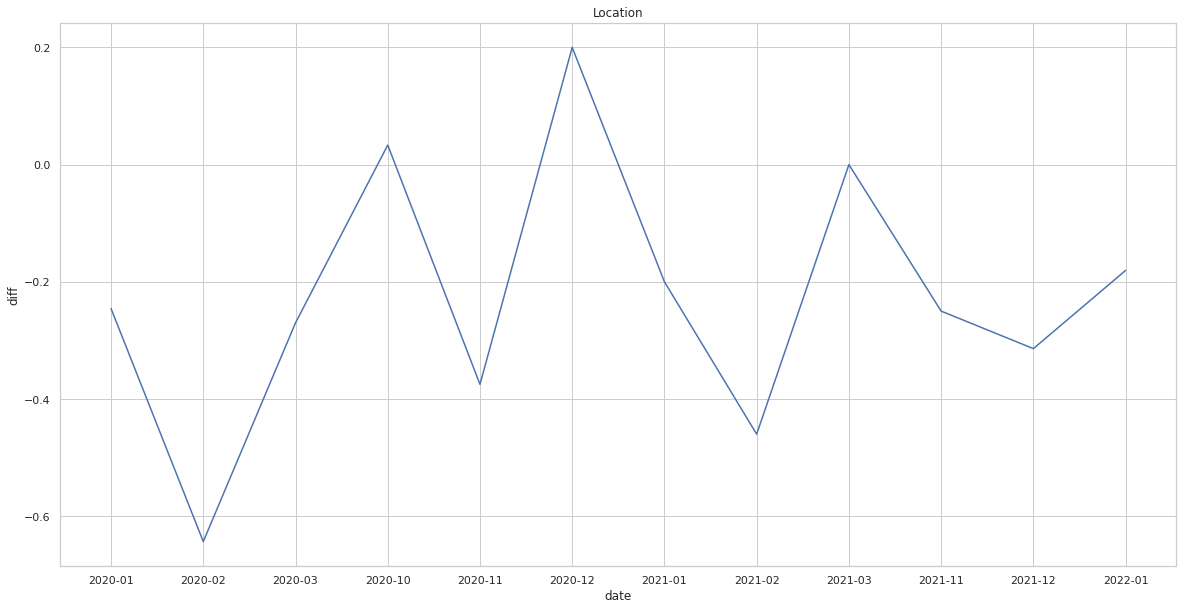

In [58]:
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,10))
plt.title("Location")

sns.lineplot(x="date", y="diff", ci=None,
            
             data=df_location)

In [59]:
df_comfort=data1[data1['category']=='comfort and facilities']
df_comfort

,aspect_opinion_pair,raw_clean_text,weight,review,date,overall_rating,rid,category,implicit or explicit,calculated_rating,aspect,opinion
6,"{'aspect': 'rooms', 'opinion': 'very cosy'}",+ rooms are very cosy + helpful staff,0.184261,+ rooms are very cosy + helpful staff,2020-01,0.88,2,comfort and facilities,explicit,0.200000,rooms,very cosy
7,"{'aspect': 'rooms', 'opinion': 'helpful'}",+ rooms are very cosy + helpful staff,0.184261,+ rooms are very cosy + helpful staff,2020-01,0.88,2,comfort and facilities,explicit,0.000000,rooms,helpful
19,"{'aspect': 'beds', 'opinion': 'so amazingly co...",the beds were so amazingly comfortable we had...,0.08115,the beds were so amazingly comfortable we had...,2020-01,0.90,4,comfort and facilities,explicit,0.400000,beds,so amazingly comfortable
21,"{'aspect': 'bathroom door', 'opinion': 'little'}",the glass bathroom door was a little odd,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",the glass bathroom door was a little odd,2020-01,0.90,4,comfort and facilities,implicit,-0.187500,bathroom door,little
22,"{'aspect': 'bathroom door', 'opinion': 'odd'}",the glass bathroom door was a little odd,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",the glass bathroom door was a little odd,2020-01,0.90,4,comfort and facilities,implicit,-0.166667,bathroom door,odd
...,...,...,...,...,...,...,...,...,...,...,...,...
377,"{'aspect': 'room', 'opinion': 'small'}",· room was a little small,0.079582,· room was a little small,2022-01,1.00,67,comfort and facilities,explicit,-0.250000,room,small
378,"{'aspect': 'beds mattress', 'opinion': 'so worn'}",one of the beds mattress was so worn out,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",one of the beds mattress was so worn out,2022-01,1.00,67,comfort and facilities,explicit,0.000000,beds mattress,so worn
380,"{'aspect': 'rooms', 'opinion': 'clean'}",rooms were clean,0.167358,rooms were clean,2022-01,0.80,68,comfort and facilities,explicit,0.366667,rooms,clean
381,"{'aspect': 'rooms', 'opinion': 'great'}",great location,0.167358,great location,2022-01,0.80,68,comfort and facilities,explicit,0.800000,rooms,great


# Overall Rating Vs Calculated Rating (Comfort and Facilities)

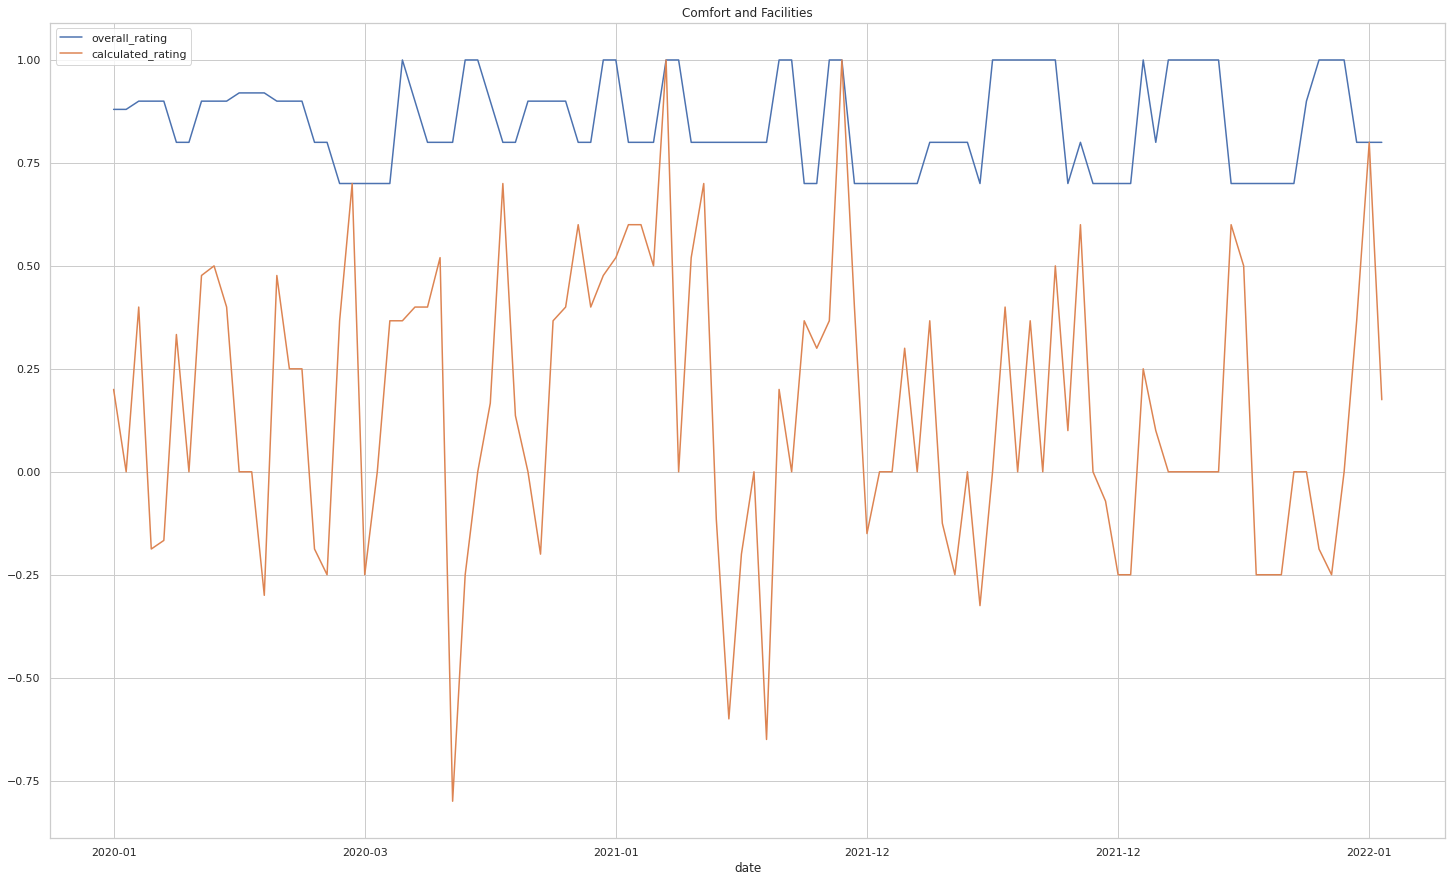

In [60]:

df_comfort.plot(x='date', y=['overall_rating', 'calculated_rating'], figsize=(25,15), grid=True,title="Comfort and Facilities")

In [61]:
df_comfort['implicit or explicit'].value_counts()

explicit    82
implicit    20
Name: implicit or explicit, dtype: int64

## implicit or explicit  (Comfort and Facilities)

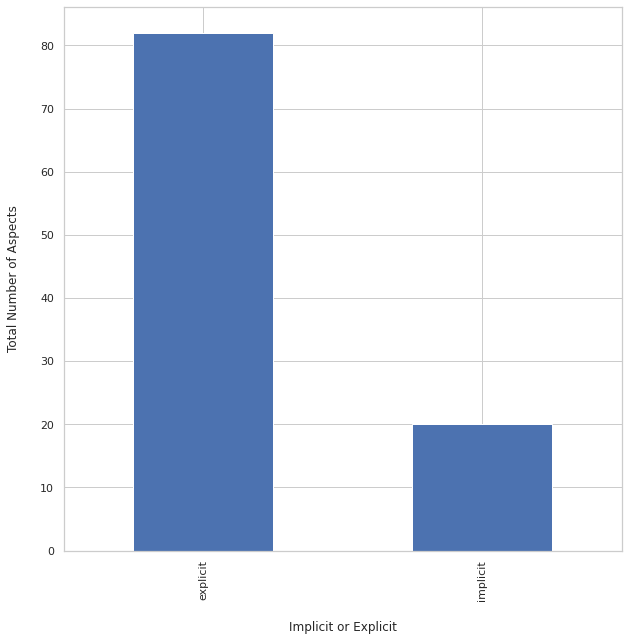

In [62]:

plt.ylabel("Total Number of Aspects", labelpad=20)
plt.xlabel("Implicit or Explicit", labelpad=20)
df_comfort['implicit or explicit'].value_counts().plot(kind='bar',figsize=(10, 10))

# **Comfort Explicit and Implicit**

In [63]:
df_comfort_implicit=df_comfort[df_comfort['implicit or explicit']=='implicit']

df_comfort_explicit=df_comfort[df_comfort['implicit or explicit']=='explicit']

In [64]:
df_comfort_implicit

,aspect_opinion_pair,raw_clean_text,weight,review,date,overall_rating,rid,category,implicit or explicit,calculated_rating,aspect,opinion
21,"{'aspect': 'bathroom door', 'opinion': 'little'}",the glass bathroom door was a little odd,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",the glass bathroom door was a little odd,2020-01,0.90,4,comfort and facilities,implicit,-0.187500,bathroom door,little
22,"{'aspect': 'bathroom door', 'opinion': 'odd'}",the glass bathroom door was a little odd,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",the glass bathroom door was a little odd,2020-01,0.90,4,comfort and facilities,implicit,-0.166667,bathroom door,odd
63,"{'aspect': 'luggage storage', 'opinion': 'free'}",luggage storage was free on day of checkout,"[[0.0, 0.05987025984239815, 0.0, 0.07053733856...",luggage storage was free on day of checkout,2020-02,0.90,7,comfort and facilities,implicit,0.400000,luggage storage,free
71,"{'aspect': 'spaces', 'opinion': 'common'}",lack of common spaces,0.181936,lack of common spaces,2020-02,0.92,8,comfort and facilities,implicit,-0.300000,spaces,common
94,"{'aspect': 'bed', 'opinion': 'good'}",good bed,0.095601,good bed,2020-03,0.70,13,comfort and facilities,implicit,0.700000,bed,good
126,"{'aspect': 'bed', 'opinion': 'comfortable'}",the bed was comfortable,0.118933,the bed was comfortable,2020-10,0.80,22,comfort and facilities,implicit,0.400000,bed,comfortable
169,"{'aspect': 'bulb', 'opinion': 'new'}",when we came back we had a new bulb,0.211638,when we came back we had a new bulb,2020-12,0.80,28,comfort and facilities,implicit,0.136364,bulb,new
174,"{'aspect': 'bed', 'opinion': 'double'}",double bed was not available,0.250892,double bed was not available,2020-12,0.90,29,comfort and facilities,implicit,0.000000,bed,double
175,"{'aspect': 'bed', 'opinion': 'not available'}",double bed was not available,0.250892,double bed was not available,2020-12,0.90,29,comfort and facilities,implicit,-0.200000,bed,not available
183,"{'aspect': 'shower', 'opinion': 'nice'}",shower were nice,0.119331,shower were nice,2021-01,0.80,32,comfort and facilities,implicit,0.600000,shower,nice


## Overall Vs Calcultaed  Comfort and Facilities (Explicit)

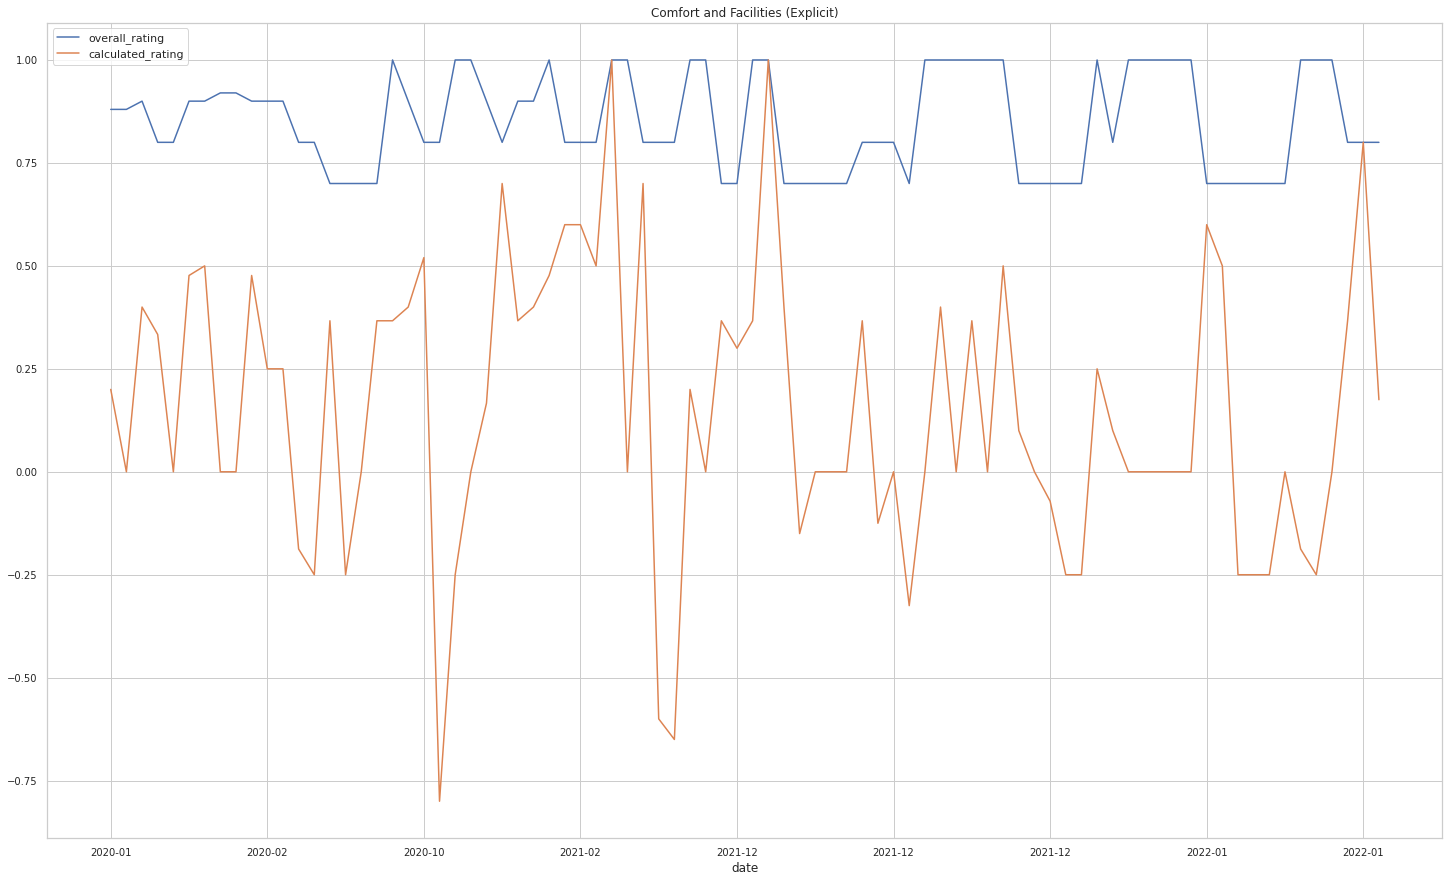

In [66]:
df_comfort_explicit.plot(x='date', y=['overall_rating', 'calculated_rating'], figsize=(25,15), grid=True,title="Comfort and Facilities (Explicit)",fontsize=10)

## Overall Vs Calcultaed  Comfort and Facilities (Implicit)

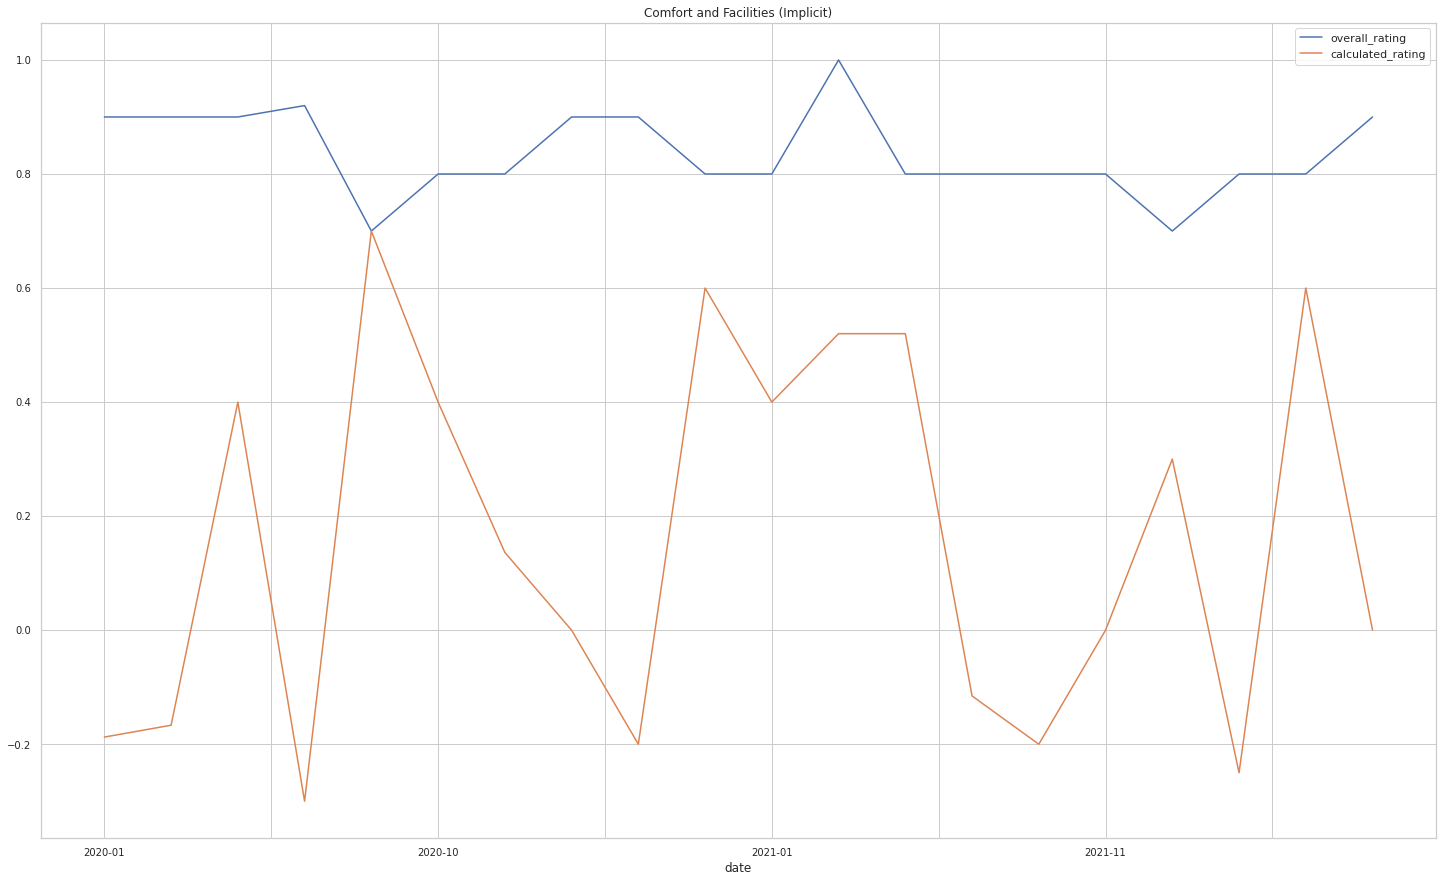

In [67]:

df_comfort_implicit.plot(x='date', y=['overall_rating', 'calculated_rating'], figsize=(25,15), grid=True,title="Comfort and Facilities (Implicit)",fontsize=10)

In [69]:
df

,Hotel Name,Review,Reviewer Name,Date,Reviewer,Rating,review,raw_review,clean_review,rid
0,Hilton Garden Inn New York Times Square North,"Location is perfect, a couple of minutes to Ti...",Naraigh,2020-01,Ireland,0.75,"location is perfect, a couple of minutes to ti...","Location is perfect, a couple of minutes to Ti...","location is perfect, a couple of minutes to ti...",0
1,Hilton Garden Inn New York Times Square North,Good Location and value for money,Muhammad,2020-01,Egypt,0.79,good location and value for money,Good Location and value for money,good location and value for money,1
2,Hilton Garden Inn New York Times Square North,"Super central location, modern & easy . locati...",Thomas,2020-01,Germany,0.88,"super central location, modern & easy . locati...","Super central location, modern & easy . locati...","super central location, modern & easy . locati...",2
3,Hilton Garden Inn New York Times Square North,"Great place in NYC. Awesome hotel, great locat...",Brett,2020-01,United States,1.00,"great place in nyc. awesome hotel, great locat...","Great place in NYC. Awesome hotel, great locat...","great place in nyc. awesome hotel, great locat...",3
4,Hilton Garden Inn New York Times Square North,"The location was fantastic, close to but far ...",Shazb,2020-01,Australia,0.90,"the location was fantastic, close to but far ...","The location was fantastic, close to but far ...","the location was fantastic, close to but far ...",4
...,...,...,...,...,...,...,...,...,...,...
66,Hilton Garden Inn New York Times Square North,Enjoyed our stay. Make sure you get your parki...,Berkley,2022-01,United States,0.90,enjoyed our stay. make sure you get your parki...,Enjoyed our stay. Make sure you get your parki...,enjoyed our stay. make sure you get your parki...,66
67,Hilton Garden Inn New York Times Square North,I liked how clean it was and the bathroom size...,Mendez,2022-01,United States,1.00,i liked how clean it was and the bathroom size...,I liked how clean it was and the bathroom size...,i liked how clean it was and the bathroom size...,67
68,Hilton Garden Inn New York Times Square North,perfect spot to see the city- central to every...,Dawn,2022-01,United States,0.80,perfect spot to see the city- central to every...,perfect spot to see the city- central to every...,perfect spot to see the city- central to every...,68
69,Hilton Garden Inn New York Times Square North,Great location. Five minutes walk to Times Sq...,Lulia,2022-01,Romania,0.80,great location. five minutes walk to times sq...,Great location. Five minutes walk to Times Sq...,great location. five minutes walk to times sq...,69


In [ ]:
df_comfort['User']=df_comfort.apply(lambda x: df['Reviewer Name'].iloc[x['rid']] if not np.isnan(x['rid']) else x['User'], axis=1)

df_comfort

In [71]:
df_comfort.to_csv("comfort.csv")
df_comfort_explicit.to_csv("comfort_explicit.csv")
df_comfort_implicit.to_csv("comfort_implicit.csv")

In [72]:
len(df_comfort['User'].unique())

42

## User Vs Overall and Calcultaed Rating Comfort and Facilities 

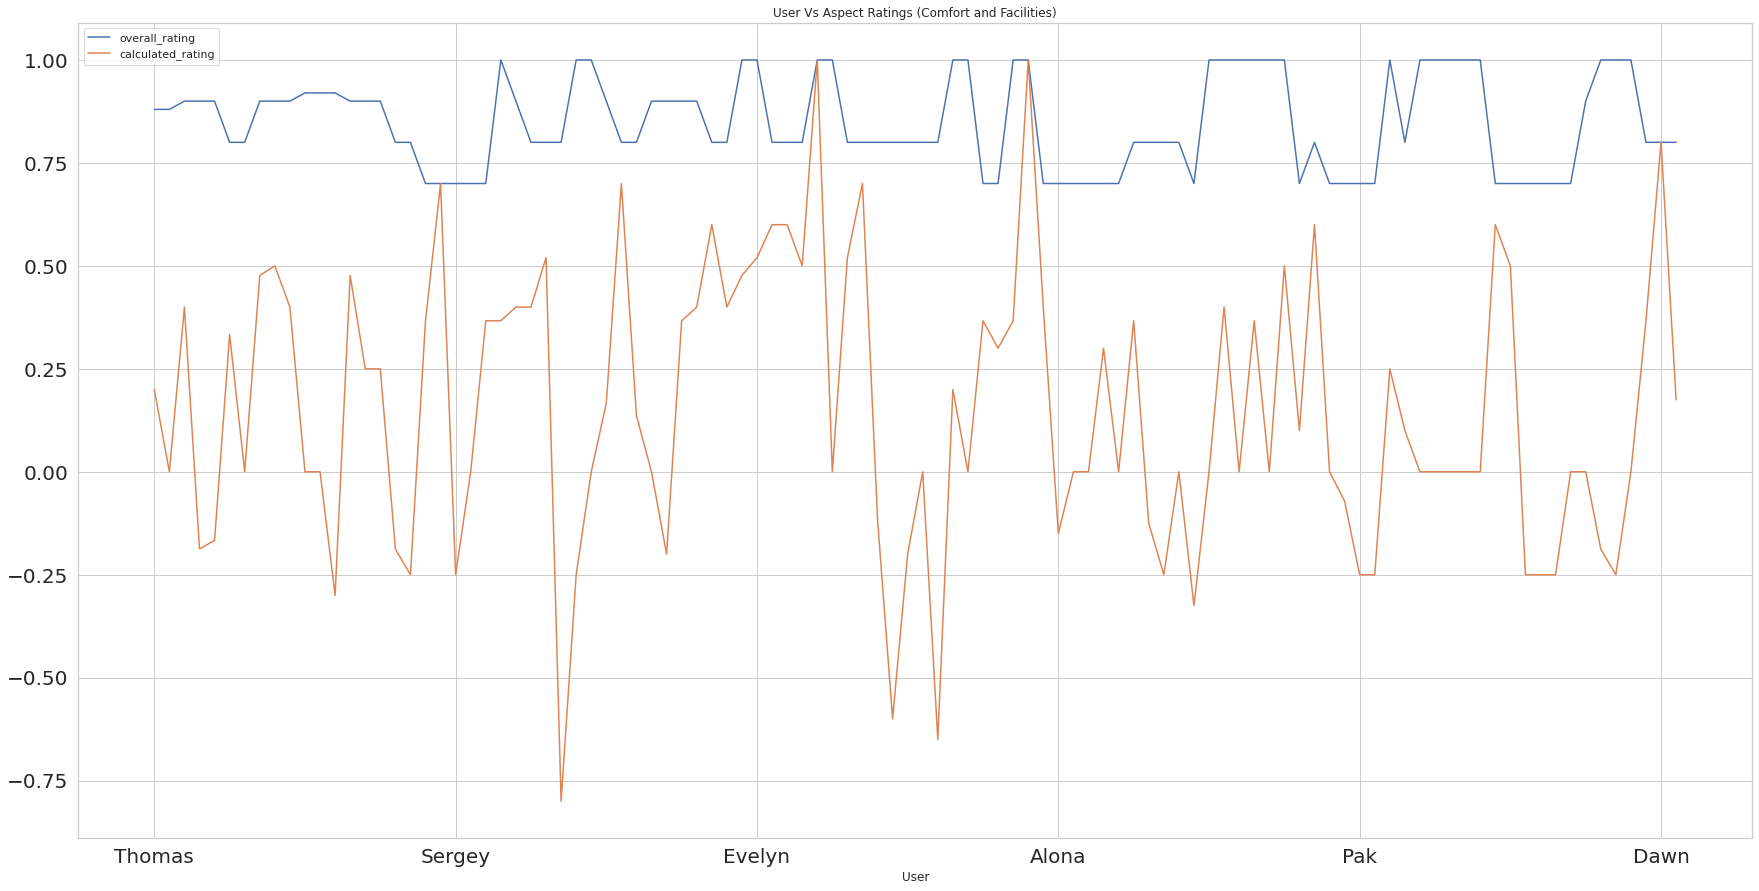

In [73]:
df_comfort.plot(x='User', y=['overall_rating', 'calculated_rating'], figsize=(30,15), grid=True,title="User Vs Aspect Ratings (Comfort and Facilities)",fontsize=20)

In [74]:
df_location['diff']=df_location.apply(lambda x: x['calculated_rating']- x['overall_rating'] if not np.isnan(x['calculated_rating']) else x['diff'], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


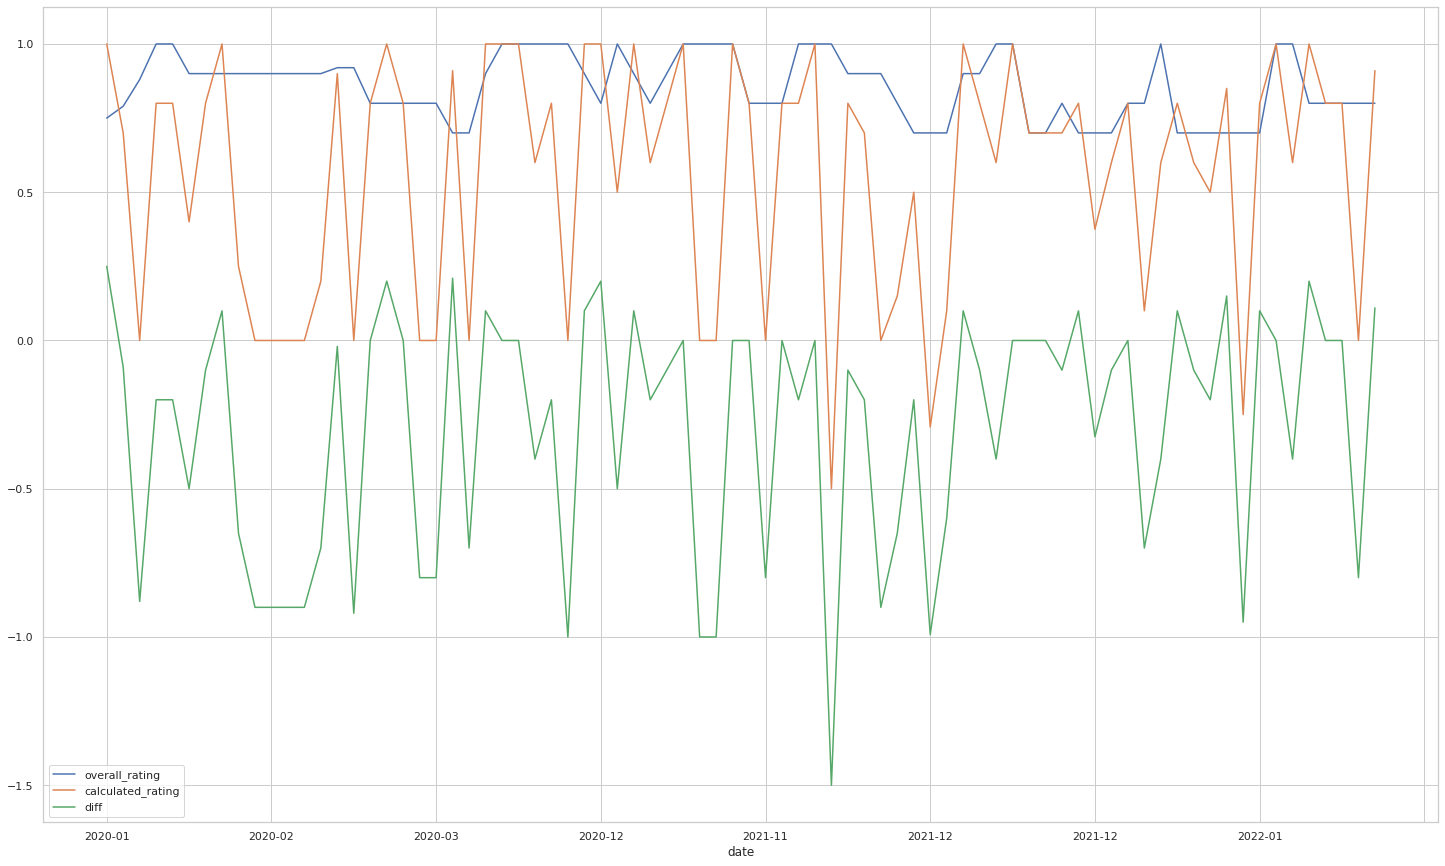

In [75]:
df_location.plot(x='date', y=['overall_rating', 'calculated_rating','diff'], figsize=(25,15), grid=True)

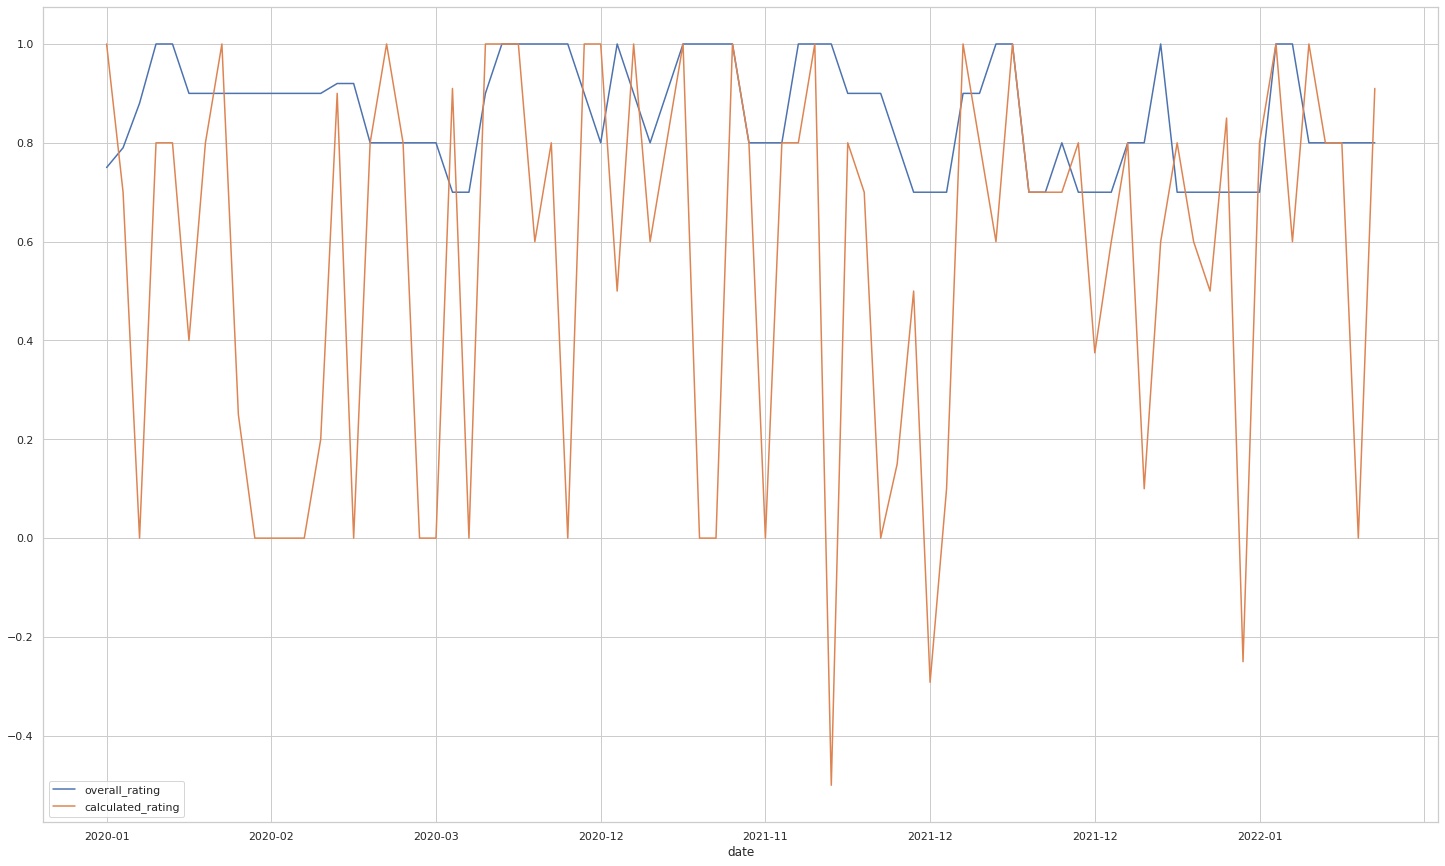

In [76]:
df_location.plot(x='date', y=['overall_rating', 'calculated_rating'], figsize=(25,15), grid=True)

In [84]:
data['implicit or explicit'].value_counts()

explicit    360
implicit     37
Name: implicit or explicit, dtype: int64

In [85]:
data['category'].value_counts()

others                    131
comfort and facilities    102
location                   78
service                    52
overall experience         20
cost                       10
food                        4
Name: category, dtype: int64

In [86]:
df_service=data[data['category']=='service']
df_food=data[data['category']=='food']
df_comfort=data[data['category']=='comfort and facilities']

In [87]:
df_service=df_service.sort_values(by=['date'])

In [88]:
df_service.head()

,aspect_opinion_pair,raw_clean_text,weight,review,date,overall_rating,rid,category,implicit or explicit,calculated_rating,aspect,opinion
8,"{'aspect': 'staff', 'opinion': 'helpful'}",+ rooms are very cosy + helpful staff,0.148535,+ rooms are very cosy + helpful staff,2020-01,0.88,2,service,explicit,0.000,staff,helpful
17,"{'aspect': 'staff', 'opinion': 'friendly'}",the staff were always friendly,0.051234,the staff were always friendly,2020-01,0.90,4,service,explicit,0.375,staff,friendly
18,"{'aspect': 'staff', 'opinion': 'helpful'}",helpful whenever we needed anything,0.051234,helpful whenever we needed anything,2020-01,0.90,4,service,explicit,0.000,staff,helpful
25,"{'aspect': 'service', 'opinion': 'outstanding'}",service was outstanding,0.166705,service was outstanding,2020-01,0.80,5,service,explicit,0.500,service,outstanding
31,"{'aspect': 'receptionist', 'opinion': 'friendly'}",receptionist were friendly,0.143028,receptionist were friendly,2020-01,0.80,6,service,explicit,0.375,receptionist,friendly


# **Service**

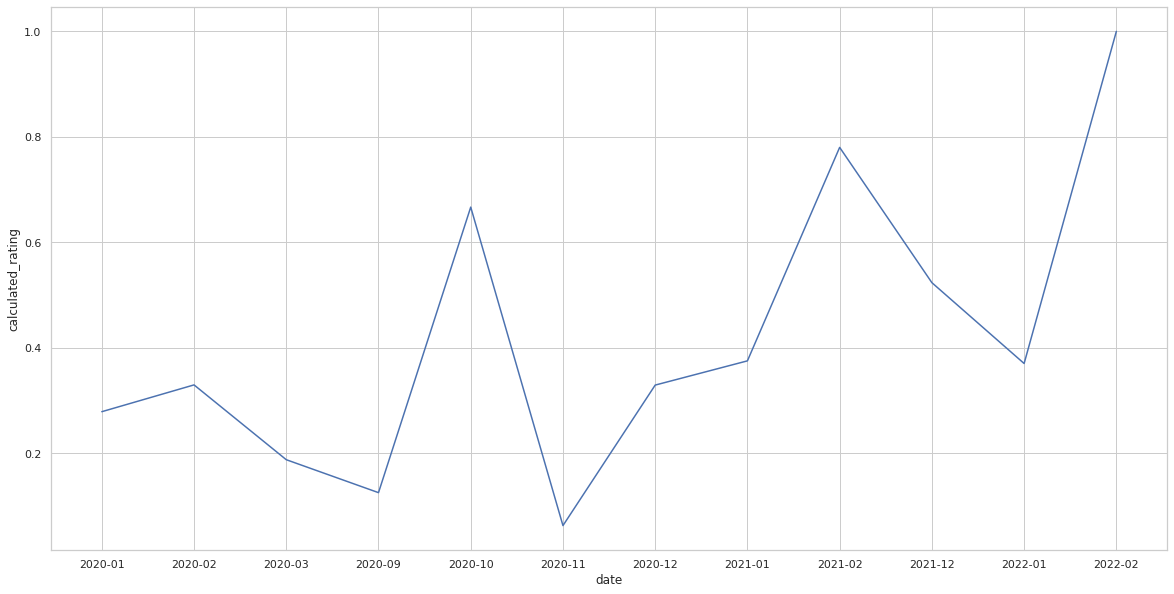

In [89]:
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,10))

sns.lineplot(x="date", y="calculated_rating", ci=None,
            
             data=df_service)

# **Location**

In [90]:
df_location=data[data['category']=='location']
df_location=df_location.sort_values(by=['date'])

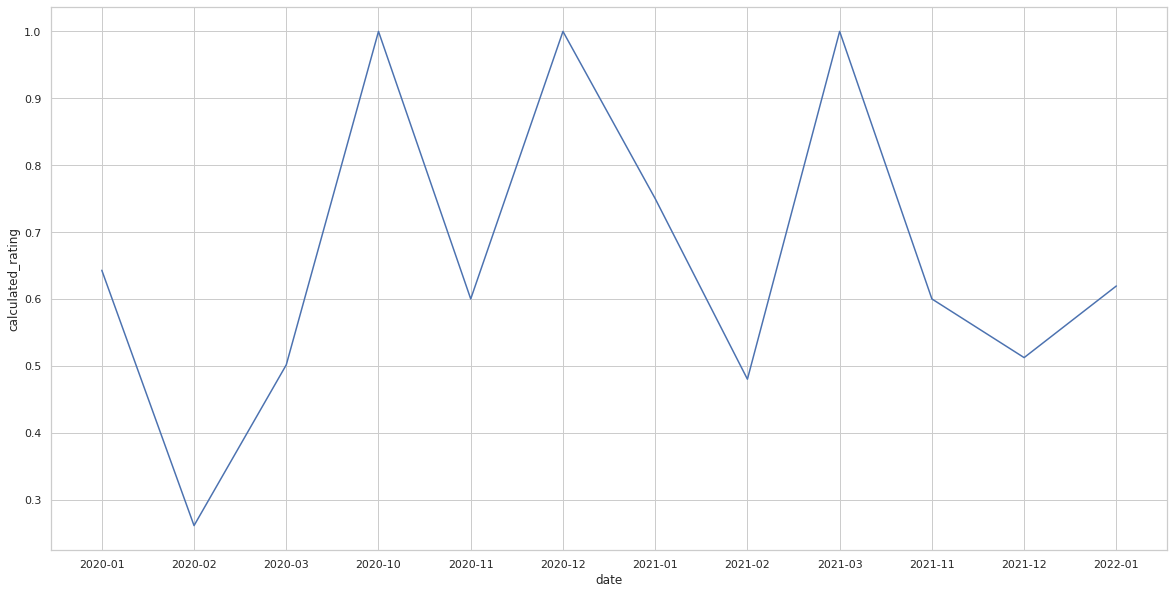

In [91]:
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,10))

sns.lineplot(x="date", y="calculated_rating", ci=None,
            
             data=df_location)

# Food

In [92]:
df_food=df_food.sort_values(by=['date'])

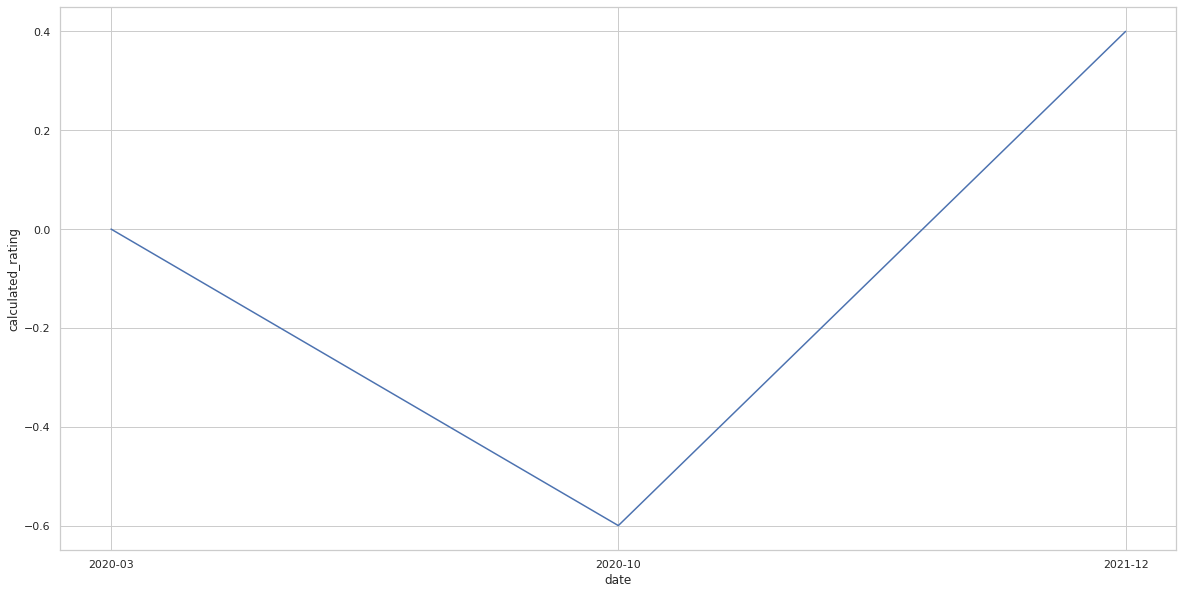

In [93]:
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,10))

sns.lineplot(x="date", y="calculated_rating", ci=None,
            
             data=df_food)

# Comfort and Facilities

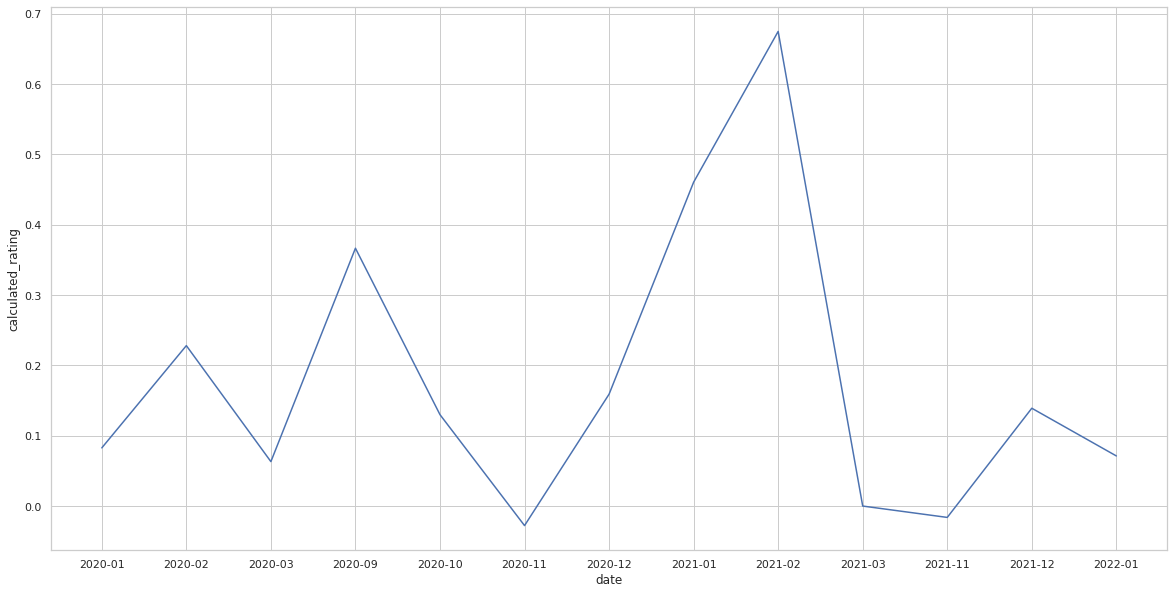

In [94]:
df_comfort=df_comfort.sort_values(by=['date'])

sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,10))

sns.lineplot(x="date", y="calculated_rating", ci=None,
            
             data=df_comfort)

# Cost

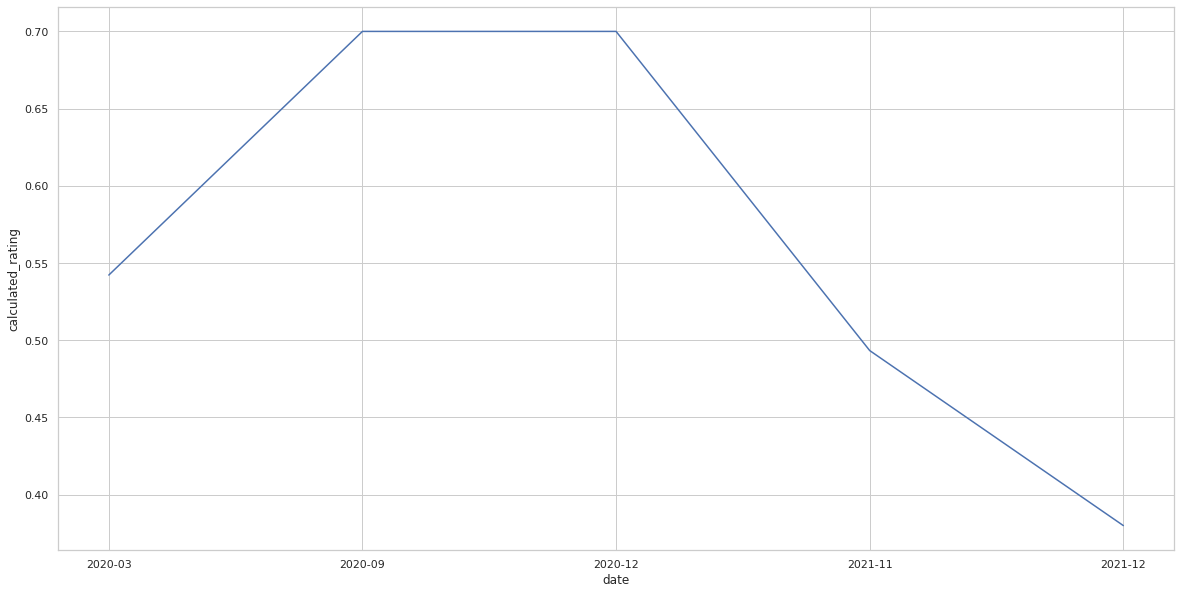

In [95]:
df_cost=data[data['category']=='cost']
df_cost=df_cost.sort_values(by=['date'])

sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,10))

sns.lineplot(x="date", y="calculated_rating", ci=None,
            
             data=df_cost)

# Overall Experience

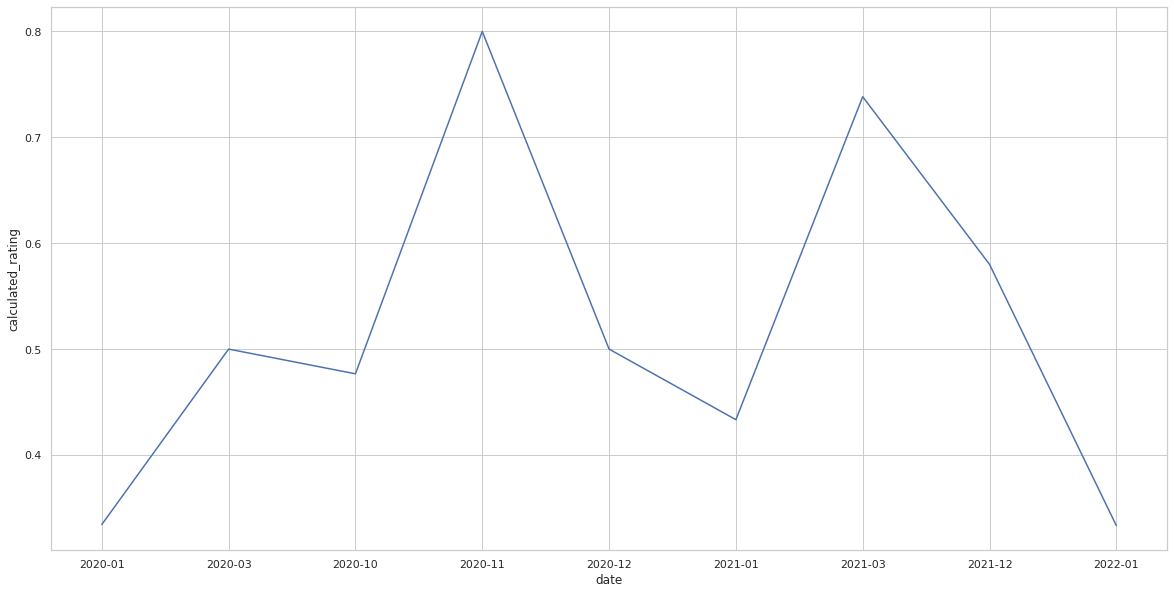

In [96]:

df_cost=data[data['category']=='overall experience']
df_cost=df_cost.sort_values(by=['date'])

sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,10))

sns.lineplot(x="date", y="calculated_rating", ci=None,
            
             data=df_cost)

# Sentiment Dynamics 


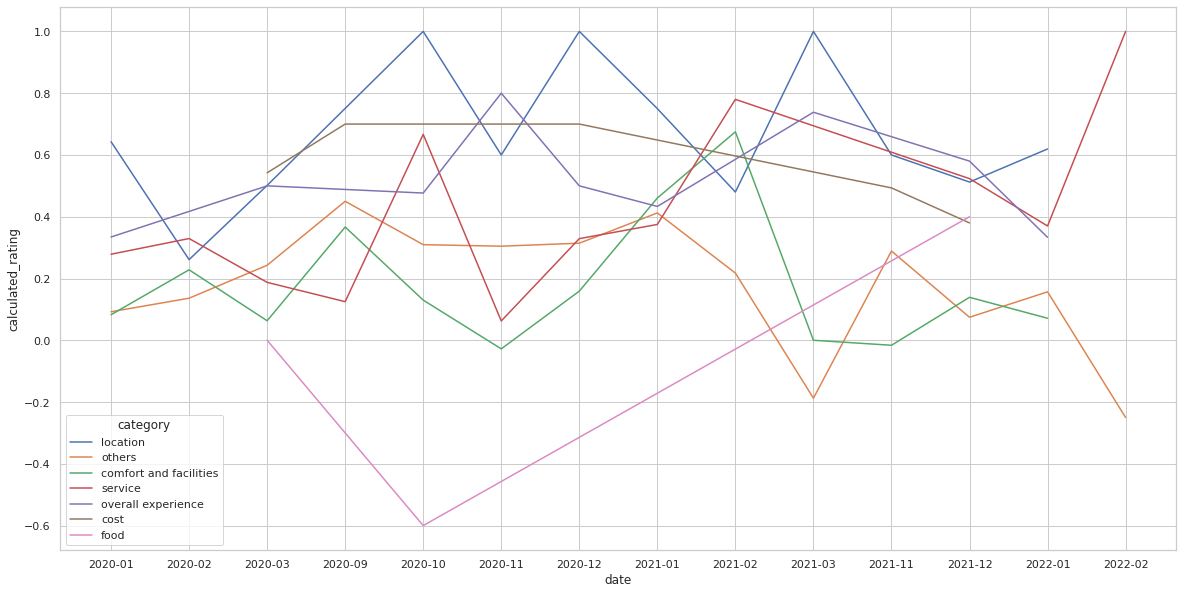

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))


# Plot the responses for different events and regions
sns.lineplot(x="date", y="calculated_rating",
             hue="category",ci=None,
             data=data)

# Website Link for reviews:
https://www.booking.com/hotel/us/cambria-suites-new-york-times-square.en-gb.html?aid=311984;label=slbr_-tpbwypfPaTLjCYLZZXkSUgS442574115832%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi169314236059%3Atikwd-1974158321%3Alp9069450%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YTQUGSsRwx9_3qo3uPTHyoo;sid=9b787918f081f15572e4eec9f300cbba;dest_id=20088325;dest_type=city;dist=0;group_adults=2;group_children=0;hapos=1;hpos=1;no_rooms=1;req_adults=2;req_children=0;room1=A%2CA;sb_price_type=total;sr_order=popularity;srepoch=1644071497;srpvid=5f626623c032016c;type=total;ucfs=1&#tab-reviews